In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid", color_codes=True)

%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 


http://www.cso.ie/webserviceclient/DatasetListing.aspx

In [2]:
from pyjstat import pyjstat
# read from json-stat
url = 'http://www.cso.ie/StatbankServices/StatbankServices.svc/jsonservice/responseinstance/HPM02'
dataset = pyjstat.Dataset.read(url)
df = dataset.write('dataframe')
print(df)

INFO:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): www.cso.ie


               County        Dwelling Status Stamp Duty Event  \
0        All Counties  All Dwelling Statuses          Filings   
1        All Counties  All Dwelling Statuses          Filings   
2        All Counties  All Dwelling Statuses          Filings   
3        All Counties  All Dwelling Statuses          Filings   
4        All Counties  All Dwelling Statuses          Filings   
5        All Counties  All Dwelling Statuses          Filings   
6        All Counties  All Dwelling Statuses          Filings   
7        All Counties  All Dwelling Statuses          Filings   
8        All Counties  All Dwelling Statuses          Filings   
9        All Counties  All Dwelling Statuses          Filings   
10       All Counties  All Dwelling Statuses          Filings   
11       All Counties  All Dwelling Statuses          Filings   
12       All Counties  All Dwelling Statuses          Filings   
13       All Counties  All Dwelling Statuses          Filings   
14       All Counties  Al

In [3]:
df1 = pd.DataFrame.from_records(df)

In [26]:
#select dublin and average house prices
df_dublin = df1.loc[(df1['County'] == 'Dublin') & (df1['Statistic'] == "Average Sale Price  (Euro)")]

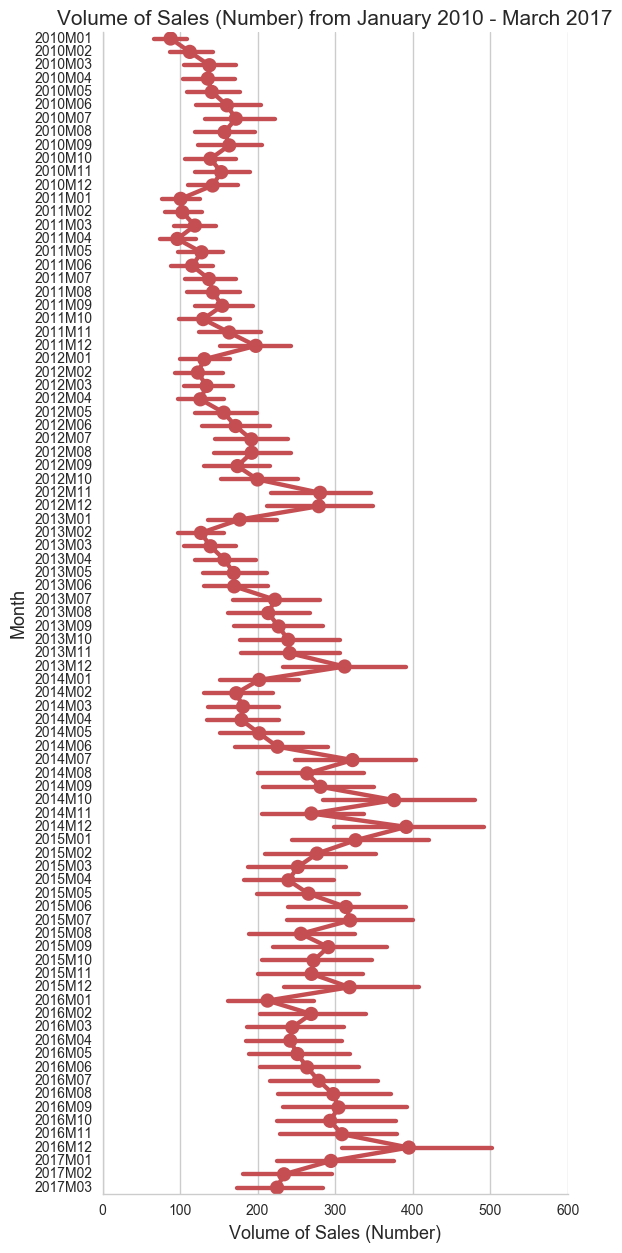

In [25]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("deep")
sns.pointplot(x="value", y="Month", data=df_dublin,
            label="Average Sale Price (Euro)", color="r")
sns.despine()

plt.title("Volume of Sales (Number) from January 2010 - March 2017", fontsize= 15)
plt.xlabel('Volume of Sales (Number)', fontsize=13)
plt.ylabel('Month', fontsize= 13)

In [6]:
#drop county and statistic
df_dublin = df_dublin.drop(["County","Statistic"] , axis = 1)

In [9]:
#Basic analysis of dataset
print ("\n\n---------------------")
print ("TRAIN SET INFORMATION")
print ("---------------------")
print ("Shape of training set:", df_dublin.shape, "\n")
print ("Column Headers:", list(df_dublin.columns.values), "\n")
print (df_dublin.dtypes)



---------------------
TRAIN SET INFORMATION
---------------------
Shape of training set: (9396, 6) 

Column Headers: ['Dwelling Status', 'Stamp Duty Event', 'Type of Buyer', 'Type of Sale', 'Month', 'value'] 

Dwelling Status      object
Stamp Duty Event     object
Type of Buyer        object
Type of Sale         object
Month                object
value               float64
dtype: object


In [10]:
import re
missing_values = []
nonumeric_values = []

print ("TRAINING SET INFORMATION")
print ("========================\n")

for column in df_dublin:
    # Find all the unique feature values
    uniq = df_dublin[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(df_dublin[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

TRAINING SET INFORMATION

'Dwelling Status' has 3 unique values
['All Dwelling Statuses' 'New' 'Existing']

-----------------------------------------------------------------------

'Stamp Duty Event' has 2 unique values
['Filings' 'Executions']

-----------------------------------------------------------------------

'Type of Buyer' has 6 unique values
['All Buyer Types' 'Household Buyer - All'
 'Household Buyer - First-Time Buyer Owner-Occupier'
 'Household Buyer - Former Owner-Occupier' 'Household Buyer - Non-Occupier'
 'Non-Household Buyer']

-----------------------------------------------------------------------

'Type of Sale' has 3 unique values
['All Sale Types' 'Market' 'Non-Market']

-----------------------------------------------------------------------

'Month' has 87 unique values
~~Listing up to 10 unique values~~
['2010M01' '2010M02' '2010M03' '2010M04' '2010M05' '2010M06' '2010M07'
 '2010M08' '2010M09' '2010M10']

---------------------------------------------------------

In [15]:
#there are 367 missing value in value
df_dublin[df_dublin.value.isnull()]

,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,Month,value
81086,All Dwelling Statuses,Filings,Non-Household Buyer,Non-Market,2010M01,NaN
87358,All Dwelling Statuses,Executions,Non-Household Buyer,Non-Market,2010M03,NaN
88670,New,Filings,All Buyer Types,Non-Market,2015M10,NaN
88686,New,Filings,All Buyer Types,Non-Market,2016M02,NaN
88694,New,Filings,All Buyer Types,Non-Market,2016M04,NaN
89650,New,Filings,Household Buyer - All,Non-Market,2014M06,NaN
89714,New,Filings,Household Buyer - All,Non-Market,2015M10,NaN
89730,New,Filings,Household Buyer - All,Non-Market,2016M02,NaN
89738,New,Filings,Household Buyer - All,Non-Market,2016M04,NaN
90522,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Non-Market,2010M11,NaN


Looking at the table above it seems it belongs to Non-market. According to 
https://en.wikipedia.org/wiki/Nonmarket_forces

Non market forces seems to have less effect on the values , hence we will delete these rows.

In [7]:
df_dublin = df_dublin[pd.notnull(df_dublin['value'])]

In [8]:
df_dublin.head()

,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,Month,value
75170,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M01,330459.0
75174,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M02,296742.0
75178,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M03,282007.0
75182,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M04,280517.0
75186,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M05,277414.0


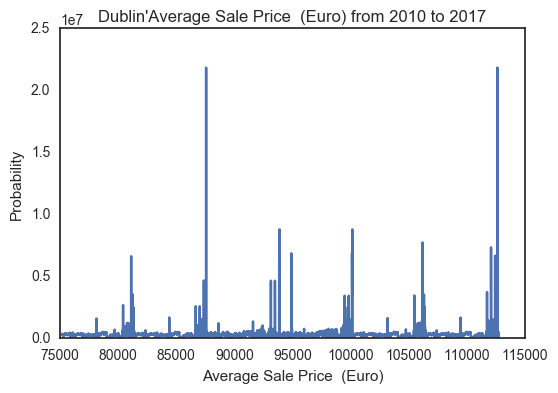

In [36]:
plt.plot(df_dublin.value)
plt.xlabel('Average Sale Price  (Euro)')
plt.ylabel('Probability')
plt.title("Dublin'Average Sale Price  (Euro) from 2010 to 2017")

In [37]:
df_dublin.describe()

,value
count,9.029000e+03
mean,2.702339e+05
std,4.472660e+05
min,0.000000e+00
25%,1.320720e+05
50%,2.598000e+05
75%,3.399200e+05
max,2.183083e+07


In [38]:
df_dublin.loc[(df_dublin['value'] == 0.0)]

,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,Month,value
81098,All Dwelling Statuses,Filings,Non-Household Buyer,Non-Market,2010M04,0.0
81102,All Dwelling Statuses,Filings,Non-Household Buyer,Non-Market,2010M05,0.0
81114,All Dwelling Statuses,Filings,Non-Household Buyer,Non-Market,2010M08,0.0
81134,All Dwelling Statuses,Filings,Non-Household Buyer,Non-Market,2011M01,0.0
81194,All Dwelling Statuses,Filings,Non-Household Buyer,Non-Market,2012M04,0.0
81306,All Dwelling Statuses,Filings,Non-Household Buyer,Non-Market,2014M08,0.0
87366,All Dwelling Statuses,Executions,Non-Household Buyer,Non-Market,2010M05,0.0
87386,All Dwelling Statuses,Executions,Non-Household Buyer,Non-Market,2010M10,0.0
87458,All Dwelling Statuses,Executions,Non-Household Buyer,Non-Market,2012M04,0.0
88414,New,Filings,All Buyer Types,Non-Market,2010M06,0.0


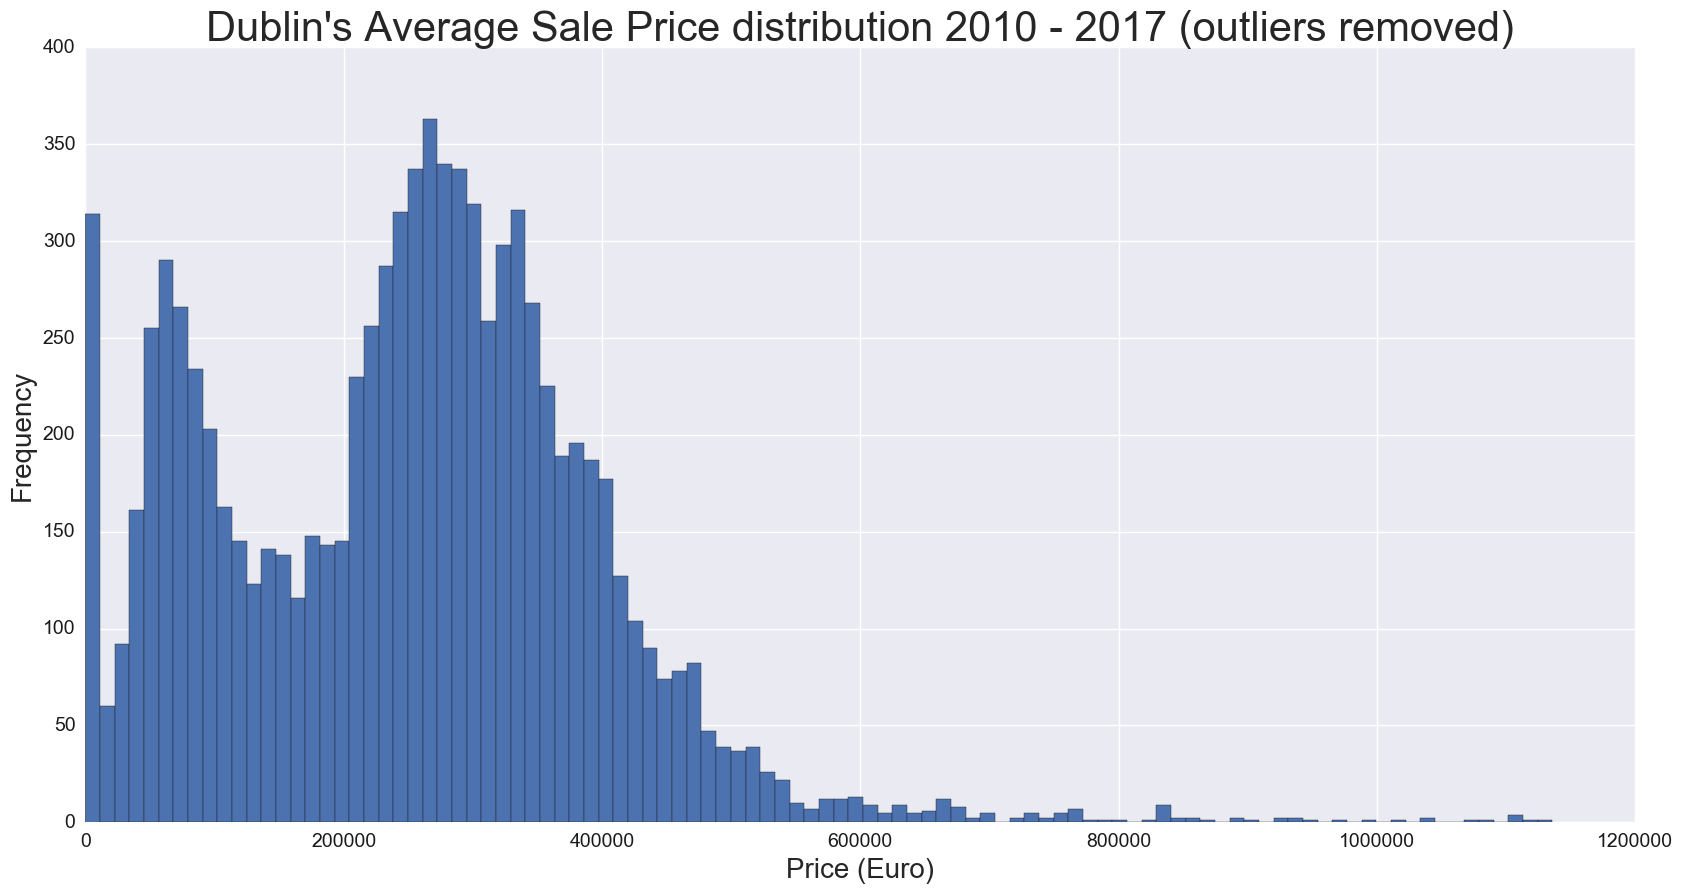

In [9]:
no_outliers = df_dublin[np.abs(df_dublin.value-df_dublin.value.mean())<=(2*df_dublin.value.std())]

fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
ax.spines['left'].set_color('#1a1a1a')
ax.spines['bottom'].set_color('#1a1a1a')

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()

plt.xticks(fontsize=14, color='#1a1a1a')  
plt.yticks(fontsize=14, color='#1a1a1a')

plt.title("Dublin's Average Sale Price distribution 2010 - 2017 (outliers removed)", fontsize=30)
plt.xlabel('Price (Euro)', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

plt.hist(no_outliers.value, bins=100);

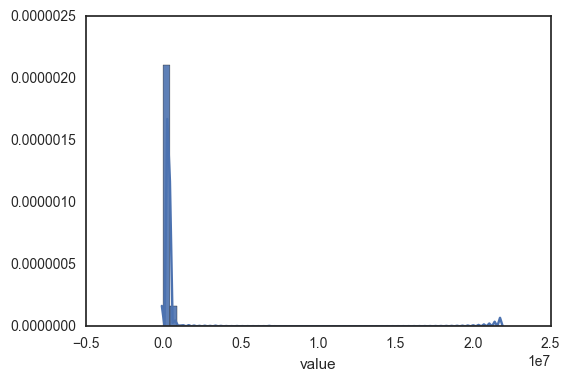

In [27]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(df_dublin['value'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

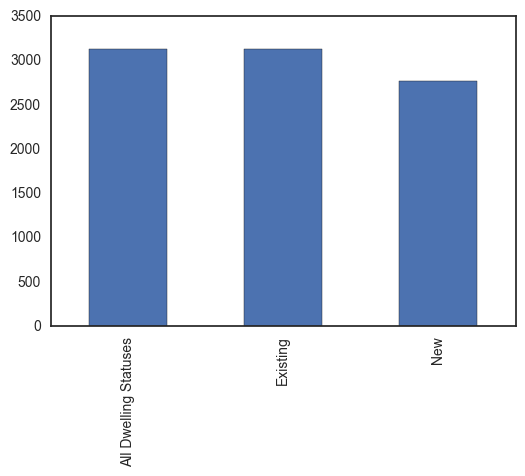

In [26]:
df_dublin['Dwelling Status'].value_counts().plot.bar()

In [21]:
df_dublin['Stamp Duty Event'].value_counts()

Filings       4532
Executions    4497
Name: Stamp Duty Event, dtype: int64

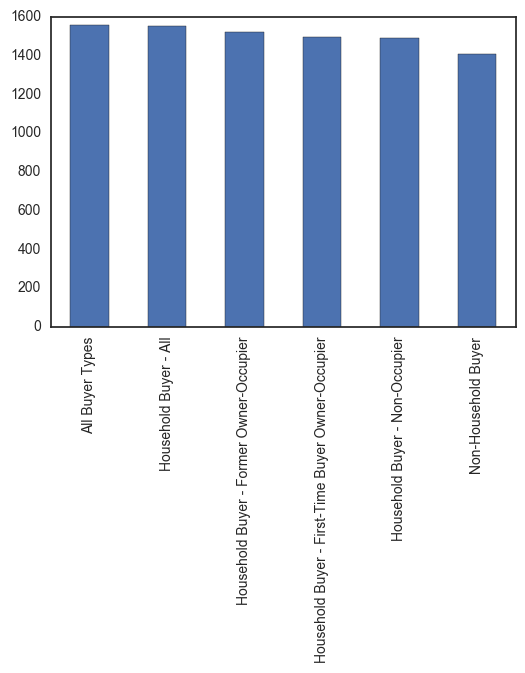

In [25]:
df_dublin['Type of Buyer'].value_counts().plot.bar()

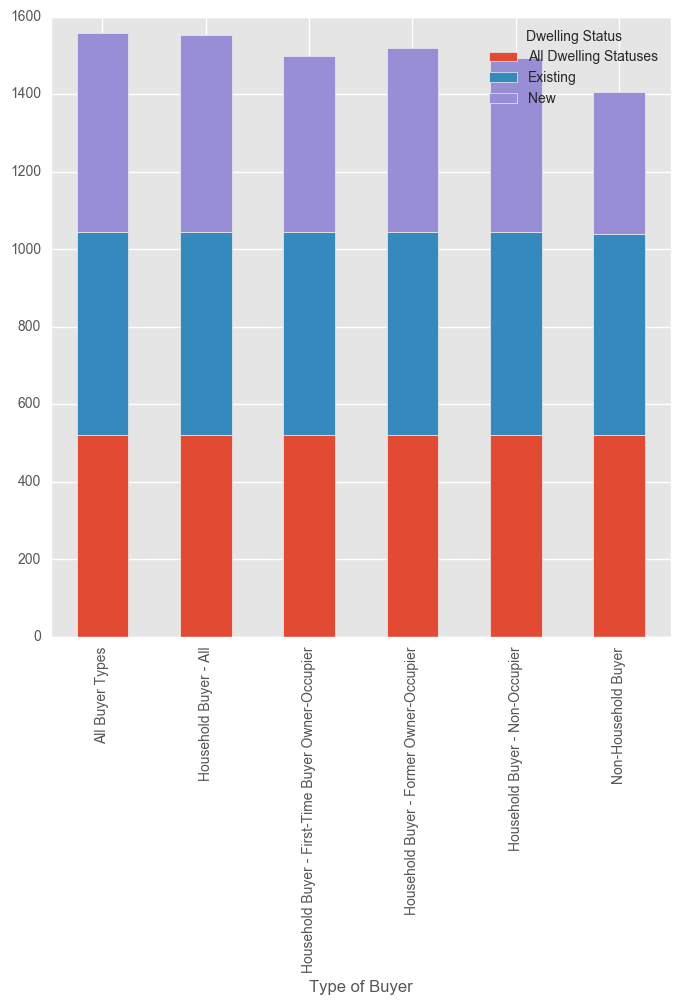

In [52]:
dwelling_buyer_table = pd.crosstab(index=df_dublin["Type of Buyer"], 
                          columns=df_dublin["Dwelling Status"])

dwelling_buyer_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [24]:
df_dublin['Type of Sale'].value_counts()

All Sale Types    3114
Market            3103
Non-Market        2812
Name: Type of Sale, dtype: int64

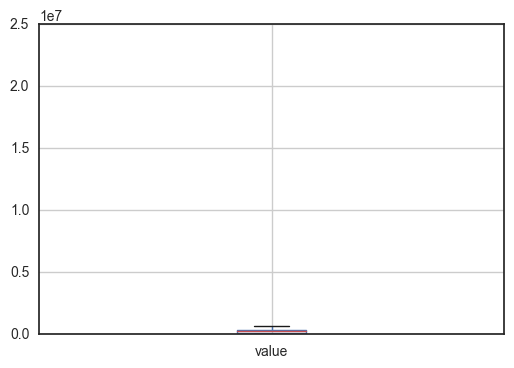

In [34]:
df_dublin.boxplot(column= 'value')  

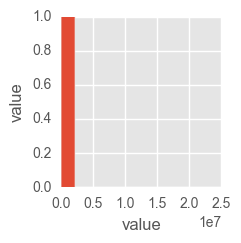

In [53]:
sns.pairplot(df_dublin, size=2.5)

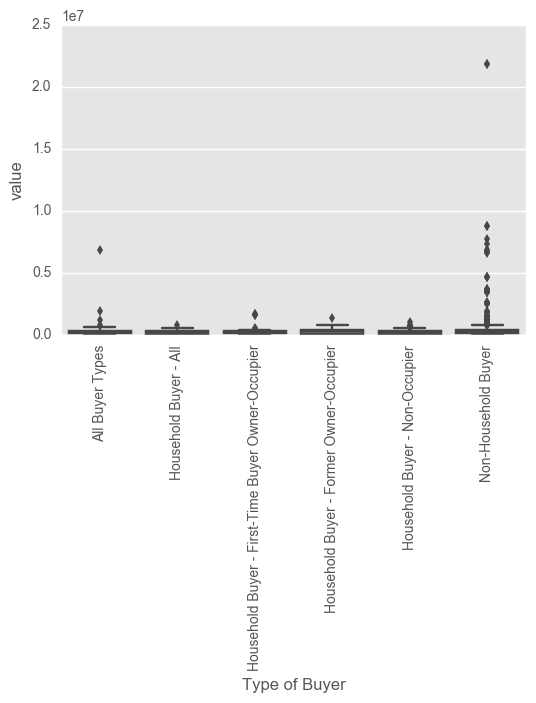

In [57]:
plt.figure(figsize = (6, 4))
sns.boxplot(x = 'Type of Buyer', y = 'value',  data = df_dublin)
xt = plt.xticks(rotation=90)

In [58]:
df_dublin.Month

75170     2010M01
75174     2010M02
75178     2010M03
75182     2010M04
75186     2010M05
75190     2010M06
75194     2010M07
75198     2010M08
75202     2010M09
75206     2010M10
75210     2010M11
75214     2010M12
75218     2011M01
75222     2011M02
75226     2011M03
75230     2011M04
75234     2011M05
75238     2011M06
75242     2011M07
75246     2011M08
75250     2011M09
75254     2011M10
75258     2011M11
75262     2011M12
75266     2012M01
75270     2012M02
75274     2012M03
75278     2012M04
75282     2012M05
75286     2012M06
           ...   
112634    2014M10
112638    2014M11
112642    2014M12
112646    2015M01
112650    2015M02
112654    2015M03
112658    2015M04
112662    2015M05
112666    2015M06
112670    2015M07
112674    2015M08
112678    2015M09
112682    2015M10
112686    2015M11
112690    2015M12
112694    2016M01
112698    2016M02
112702    2016M03
112706    2016M04
112710    2016M05
112714    2016M06
112718    2016M07
112722    2016M08
112726    2016M09
112730    

In [10]:
#https://stackoverflow.com/questions/31617845/how-to-select-rows-in-a-dataframe-between-two-values-in-python-pandas
df_10_106 = df_dublin[df_dublin['Month'].between('2010M01', '2010M06', inclusive=True)]

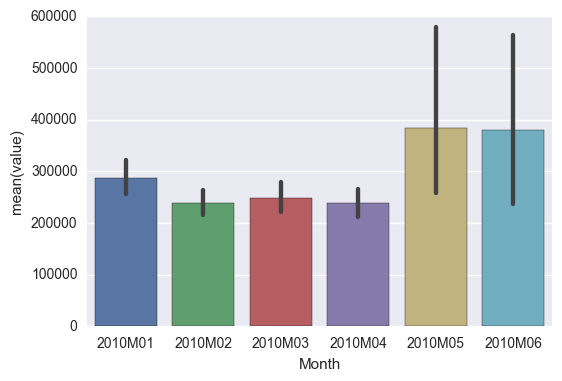

In [12]:
sns.barplot(x='Month', y='value', data=df_10_106)
sns.despine()

In [20]:

df_107_1012 = df_dublin[df_dublin['Month'].between('2010M07', '2010M12', inclusive=True)]

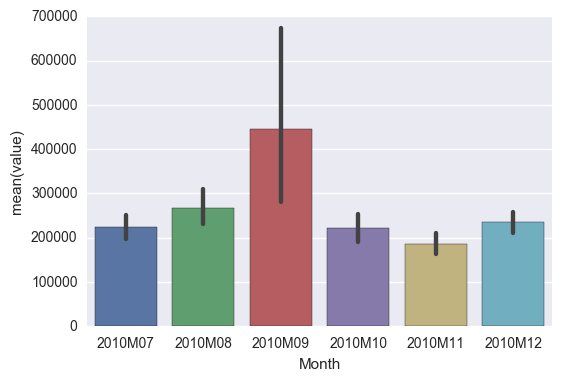

In [21]:
sns.barplot(x='Month', y='value', data=df_107_1012)
sns.despine()

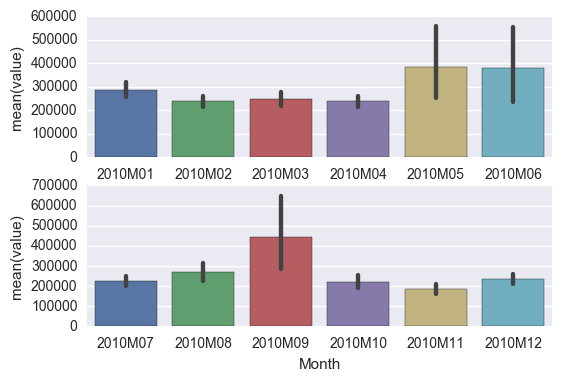

In [28]:
# Create a figure instance, and the two subplots
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Tell pointplot to plot on ax1 with the ax argument
sns.barplot(x="Month", y="value", data=df_10_106, ax=ax1)

# Tell pointplot to plot on ax2 with the ax argument
sns.barplot(x="Month", y="value", data=df_107_1012, ax=ax2)




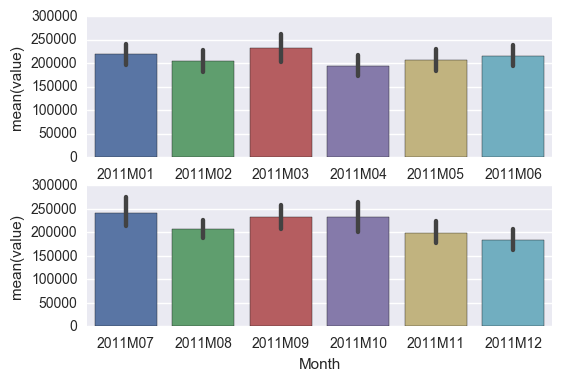

In [32]:
#Year 2011
df_11_1106 = df_dublin[df_dublin['Month'].between('2011M01', '2011M06', inclusive=True)]
df_117_1112 = df_dublin[df_dublin['Month'].between('2011M07', '2011M12', inclusive=True)]
# Create a figure instance, and the two subplots
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Tell pointplot to plot on ax1 with the ax argument
sns.barplot(x="Month", y="value", data=df_11_1106, ax=ax1)
sns.despine()

# Tell pointplot to plot on ax2 with the ax argument
sns.barplot(x="Month", y="value", data=df_117_1112, ax=ax2)
sns.despine()


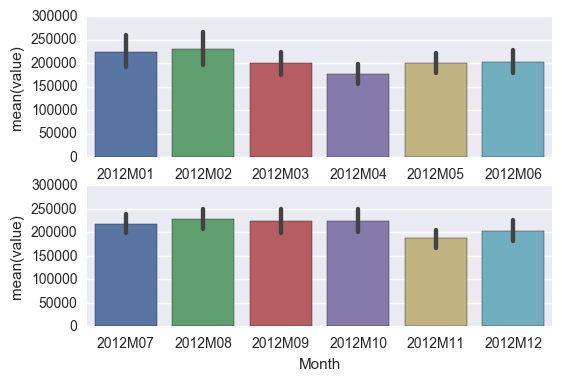

In [36]:
#Year 2012
df_12_1206 = df_dublin[df_dublin['Month'].between('2012M01', '2012M06', inclusive=True)]
df_127_1212 = df_dublin[df_dublin['Month'].between('2012M07', '2012M12', inclusive=True)]
# Create a figure instance, and the two subplots
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


# Tell pointplot to plot on ax1 with the ax argument
sns.barplot(x="Month", y="value", data=df_12_1206, ax=ax1)
sns.despine()

# Tell pointplot to plot on ax2 with the ax argument
sns.barplot(x="Month", y="value", data=df_127_1212, ax=ax2)
sns.despine()



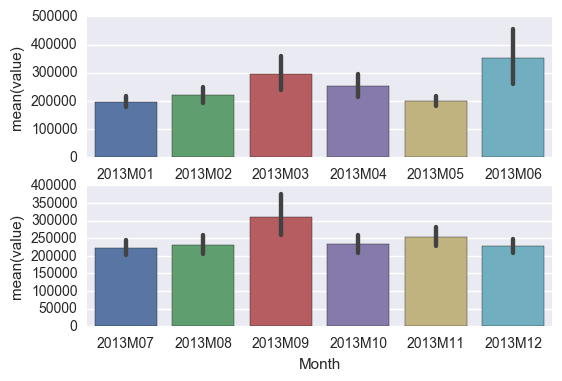

In [37]:
#Year 2013
df_13_1306 = df_dublin[df_dublin['Month'].between('2013M01', '2013M06', inclusive=True)]
df_137_1312 = df_dublin[df_dublin['Month'].between('2013M07', '2013M12', inclusive=True)]
# Create a figure instance, and the two subplots
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


# Tell pointplot to plot on ax1 with the ax argument
sns.barplot(x="Month", y="value", data=df_13_1306, ax=ax1)
sns.despine()

# Tell pointplot to plot on ax2 with the ax argument
sns.barplot(x="Month", y="value", data=df_137_1312, ax=ax2)
sns.despine()



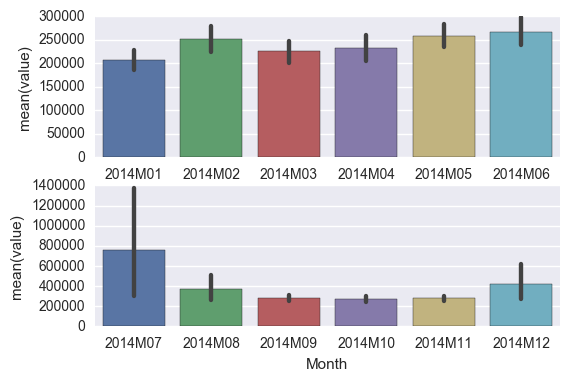

In [38]:
#Year 2014
df_14_1406 = df_dublin[df_dublin['Month'].between('2014M01', '2014M06', inclusive=True)]
df_147_1412 = df_dublin[df_dublin['Month'].between('2014M07', '2014M12', inclusive=True)]
# Create a figure instance, and the two subplots
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


# Tell pointplot to plot on ax1 with the ax argument
sns.barplot(x="Month", y="value", data=df_14_1406, ax=ax1)
sns.despine()

# Tell pointplot to plot on ax2 with the ax argument
sns.barplot(x="Month", y="value", data=df_147_1412, ax=ax2)
sns.despine()



# The Bar plot the mean value is not consistent

In [27]:
#Year 2015 - 17
df_15_1703 = df_dublin[df_dublin['Month'].between('2015M01', '2017M03', inclusive=True)]

In [31]:
df_15_1703.value.mean()

306713.98568872985

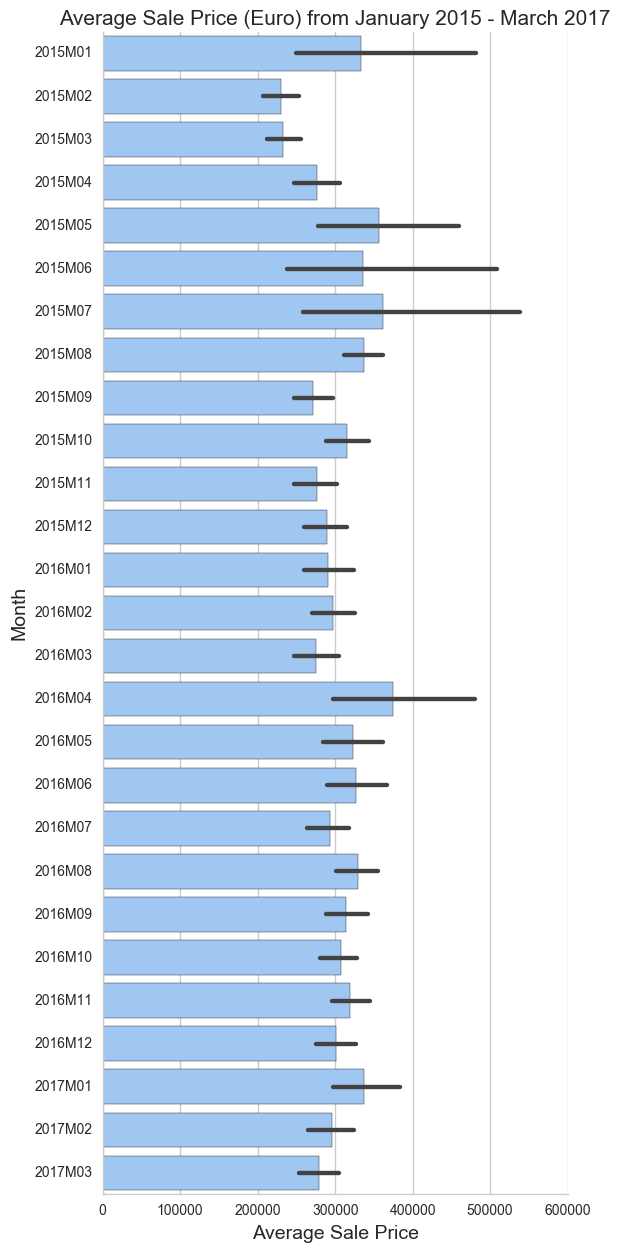

In [29]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="value", y="Month", data=df_15_1703,
            label="Average Sale Price (Euro)", color="b")
sns.despine()
plt.title("Average Sale Price (Euro) from January 2015 - March 2017", fontsize= 15)
plt.xlabel('Average Sale Price', fontsize=14)
plt.ylabel('Month', fontsize= 14)

In [46]:
#Year 2016 - 17
df_16_1703 = df_dublin[df_dublin['Month'].between('2016M01', '2017M03', inclusive=True)]

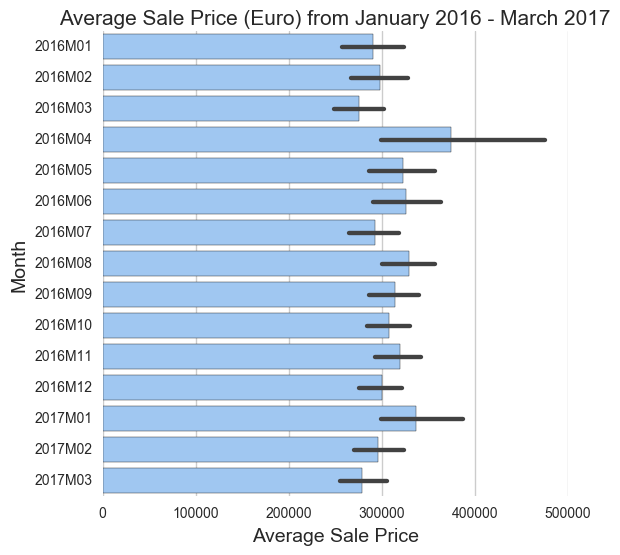

In [90]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="value", y="Month", data=df_16_1703,
             color="b")
sns.despine(left=True, bottom=True)

plt.title("Average Sale Price (Euro) from January 2016 - March 2017", fontsize= 15)
plt.xlabel('Average Sale Price', fontsize=14)
plt.ylabel('Month', fontsize= 14)

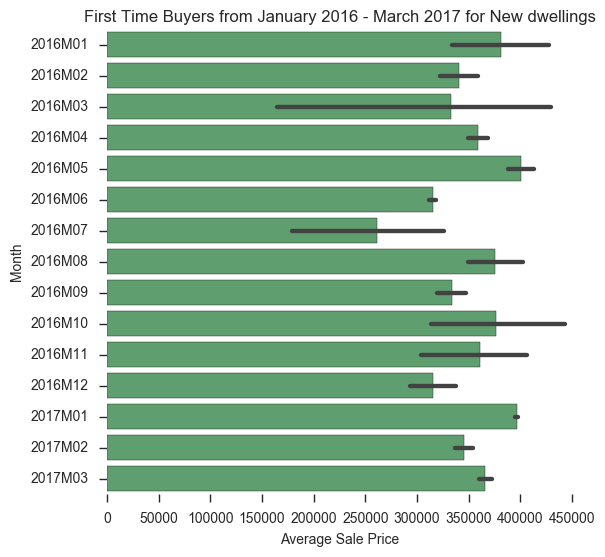

In [94]:
#Year 2016 - 17 for first time buyers and new dwelling
df_16_1703_first = df_16_1703.loc[(df_16_1703['Type of Buyer'] == 'Household Buyer - First-Time Buyer Owner-Occupier') & (df_16_1703["Dwelling Status"] == "New")]
sns.set(style="ticks")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Plot the total crashes
sns.set_color_codes("deep")
sns.barplot(x="value", y="Month", data=df_16_1703_first,
             color="g")
sns.despine(left=True, bottom=True)
plt.title("First Time Buyers from January 2016 - March 2017 for New Dwellings", fontsize= 12 )
plt.xlabel('Average Sale Price', fontsize=10)
plt.ylabel('Month', fontsize= 10)

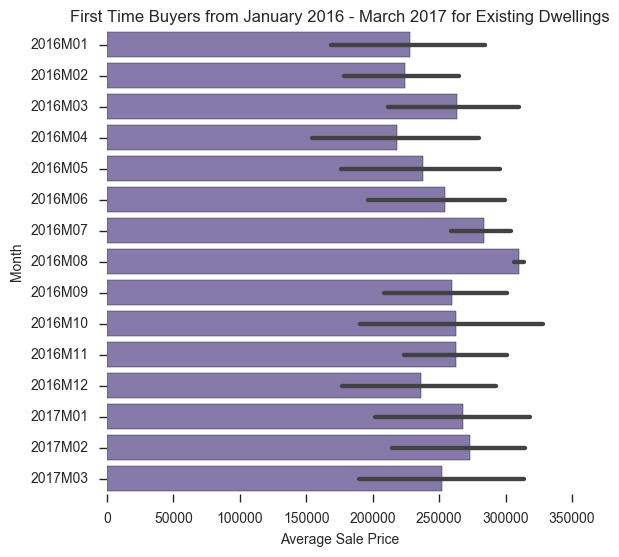

In [97]:
#Year 2016 - 17 for first time buyers and new dwelling
df_16_1703_first = df_16_1703.loc[(df_16_1703['Type of Buyer'] == 'Household Buyer - First-Time Buyer Owner-Occupier') & (df_16_1703["Dwelling Status"] == "Existing")]
sns.set(style="ticks")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Plot the total crashes
sns.set_color_codes("deep")
sns.barplot(x="value", y="Month", data=df_16_1703_first,
             color="m")
sns.despine(left=True, bottom=True)
plt.title("First Time Buyers from January 2016 - March 2017 for Existing Dwellings", fontsize= 12 )
plt.xlabel('Average Sale Price', fontsize=10)
plt.ylabel('Month', fontsize= 10)

sns.swarmplot(x="Month", y="value", data=df_10_106)

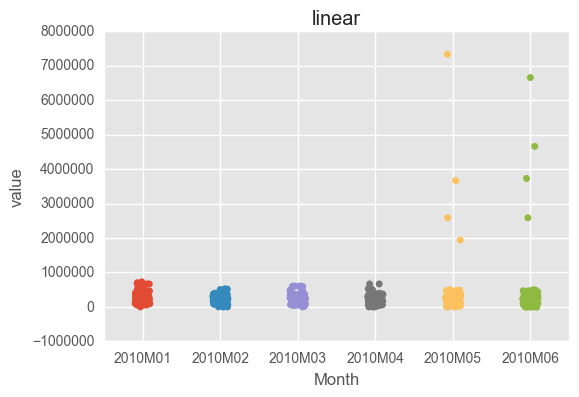

In [92]:
# plot with various axes scales
plt.figure()
sns.stripplot(x="Month", y="value", data=df_10_106,jitter = True)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)



In [93]:
df_107_1012 = df_dublin[df_dublin['Month'].between('2010M07', '2010M12', inclusive=True)]

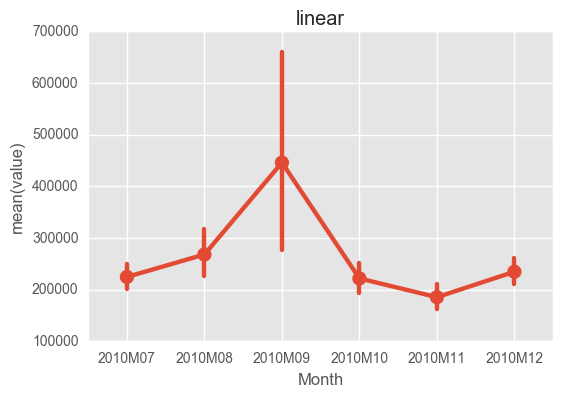

In [98]:
# plot with various axes scales
plt.figure()
sns.pointplot(x="Month", y="value", data=df_107_1012)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)



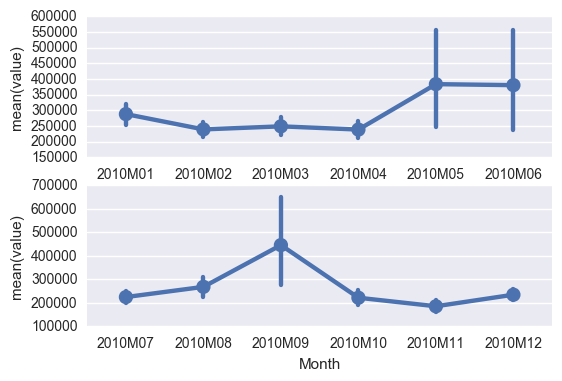

In [27]:
# Create a figure instance, and the two subplots
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Tell pointplot to plot on ax1 with the ax argument
sns.pointplot(x="Month", y="value", data=df_10_106, ax=ax1)

# Tell pointplot to plot on ax2 with the ax argument
sns.pointplot(x="Month", y="value", data=df_107_1012, ax=ax2)




In [100]:
df_11_1106 = df_dublin[df_dublin['Month'].between('2011M01', '2011M06', inclusive=True)]
df_117_1112 = df_dublin[df_dublin['Month'].between('2011M07', '2011M12', inclusive=True)]

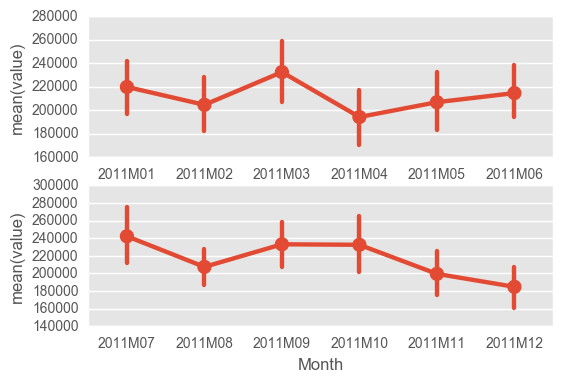

In [ ]:
g = sns.FacetGrid(df_107_1012, col="value",  row="Month")
g = g.map(sns.pointplot)

In [ ]:
df_10_106 = df_dublin[df_dublin['Month'].between('2010M01', '2010M06', inclusive=True)]